# Logistic Regression on the Titanic Dataset

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
train = pd.read_csv('train.csv')

In [101]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


## Exploratory Data Analysis

In [102]:
train.isnull().head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False


<Axes: >

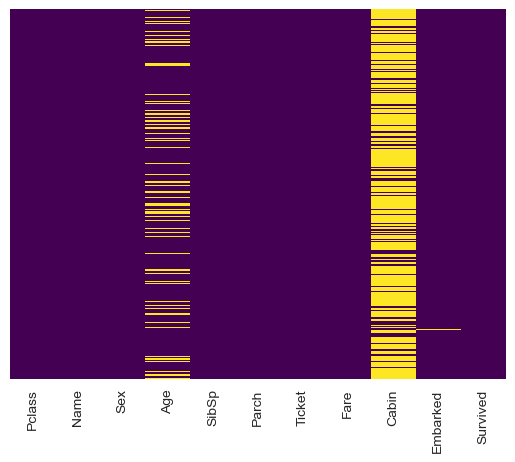

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

If we glimpse at the data, we're missing some age information, we're missing a lot of cabin info and we're missing one row of embarked.
We'll come back to this problem of missing data a little later. But before that lets focus on some exploratory data analysis on a visual level.

In [104]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

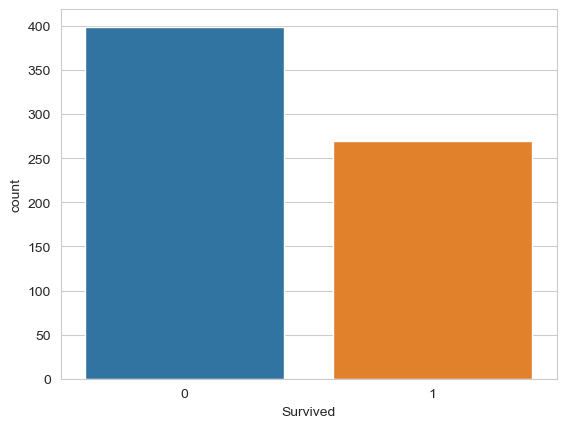

In [108]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

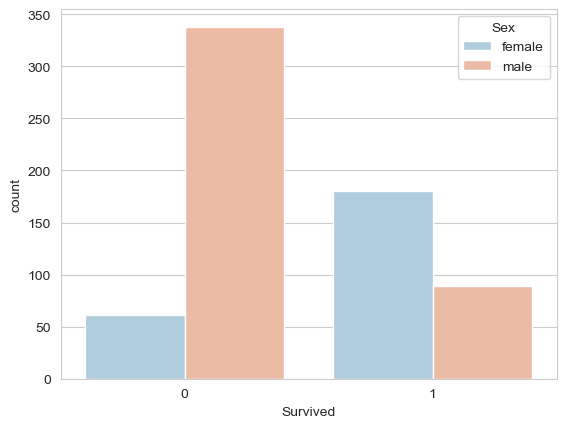

In [109]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

Clearly there's a trend here. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.

<Axes: xlabel='Survived', ylabel='count'>

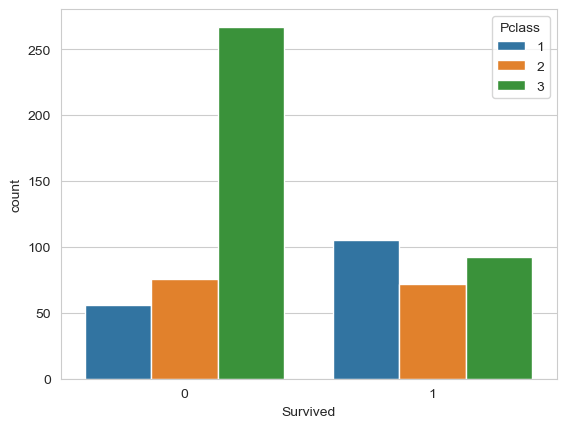

In [110]:
sns.countplot(x='Survived',data=train,hue='Pclass')

Also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes.

Now lets try and understand the age of the onboard passengers.

C:\Users\Suchita\AppData\Local\Temp\ipykernel_11972\2652588382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),bins=30,kde=False)


<Axes: xlabel='Age'>

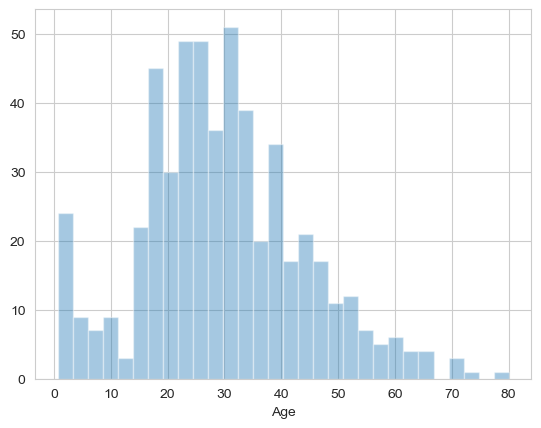

In [111]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

There seems to be an interesting bi-modal distribution where there are quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-30.

<Axes: xlabel='SibSp', ylabel='count'>

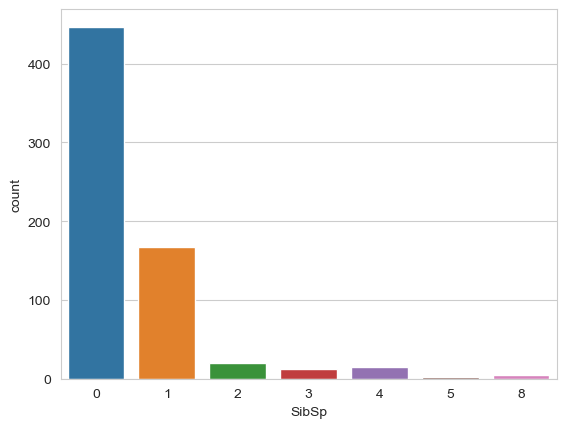

In [112]:
sns.countplot(x='SibSp',data=train)

<Axes: >

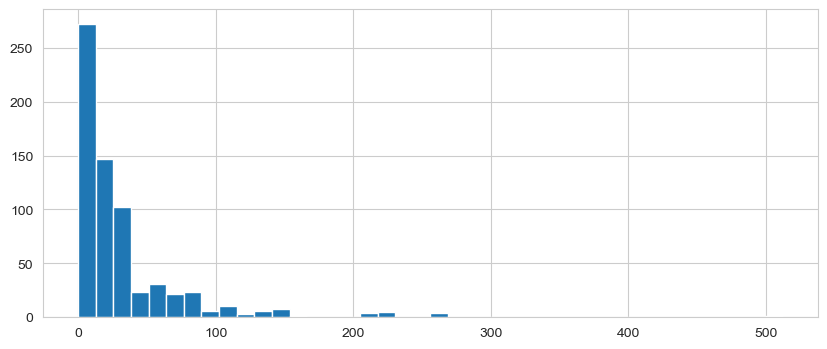

In [113]:
train['Fare'].hist(bins=40,figsize=(10,4))

## Cleaning Data

As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

<Axes: xlabel='Pclass', ylabel='Age'>

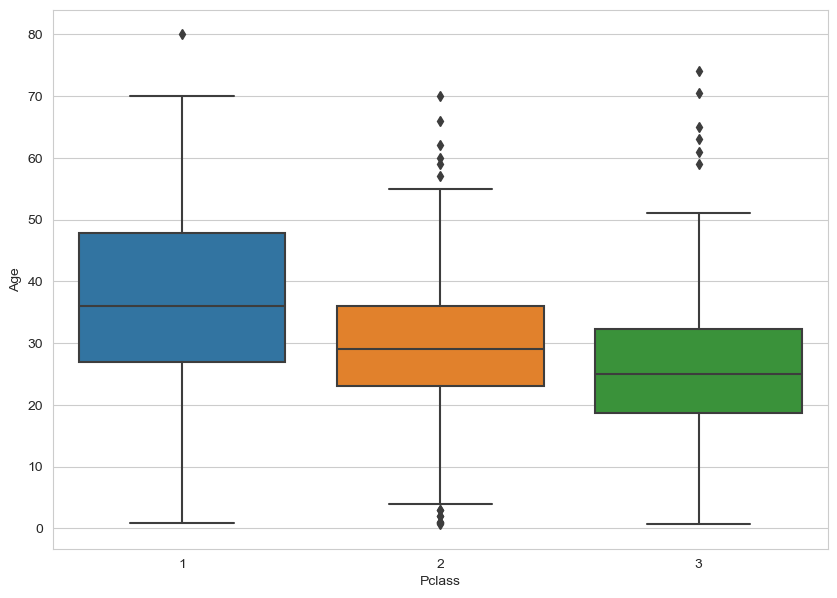

In [114]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [115]:
train.groupby('Pclass').mean()['Age'].round()

C:\Users\Suchita\AppData\Local\Temp\ipykernel_11972\4131661630.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Pclass').mean()['Age'].round()


Pclass
1    37.0
2    30.0
3    26.0
Name: Age, dtype: float64

In [116]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round().loc[3]

C:\Users\Suchita\AppData\Local\Temp\ipykernel_11972\3423605881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
C:\Users\Suchita\AppData\Local\Temp\ipykernel_11972\3423605881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
C:\Users\Suchita\AppData\Local\Temp\ipykernel_11972\3423605881.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

In [117]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: >

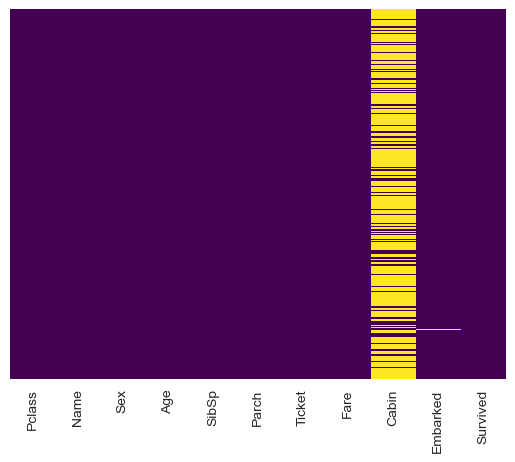

In [118]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

I'm going to just drop the cabin column since there's too much missing information.

In [119]:
train.drop('Cabin',axis=1,inplace=True)

In [120]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column

I will now convert some of the categorical features in the dataset into dummy variables that our machine learning model can accept.

In [121]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [122]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [123]:
train = pd.concat([train,sex,embark],axis=1)

In [124]:
train.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.00,S,1,0,0,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,26.0,0,0,A/5 2466,8.05,S,0,1,0,1


In [125]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [127]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,26.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


Now lets perform similar data cleaning on the test data.

In [128]:
test = pd.read_csv('test.csv')

In [129]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: >

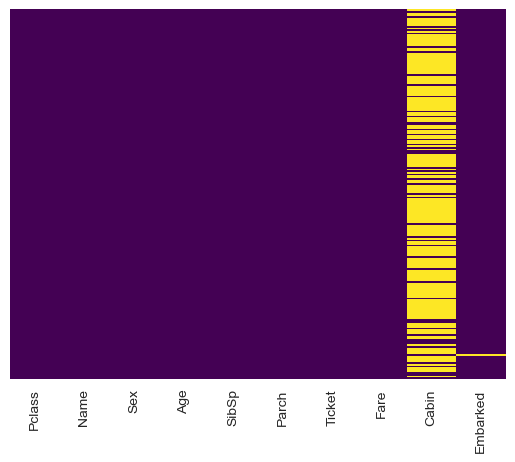

In [130]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [131]:
test.drop('Cabin',axis=1,inplace=True)

In [132]:
test.dropna(inplace=True)

In [133]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [134]:
test = pd.concat([test,sex,embark],axis=1)

In [135]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,26.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


## Train and build Classifier

In [137]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Suchita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
logmodel.score(X_train,y_train)

0.8090128755364807

In [143]:
logmodel.score(X_test,y_test)

0.8109452736318408

## Making Predictions

In [145]:
predictions = logmodel.predict(test)

In [146]:
final_prediction = pd.DataFrame({'Survived':predictions})

In [147]:
final_prediction

,Survived
0,0
1,1
2,0
3,1
4,0
...,...
217,0
218,0
219,1
220,0


In [148]:
import pandas as pd

# Assuming 'predictions' is the variable containing your predictions for the X test data

# Convert predictions to a DataFrame
df_predictions = pd.DataFrame(predictions)

# Save the DataFrame to a CSV file without headers
df_predictions.to_csv('predictions.csv', index=False, header=False)


In [149]:
import csv

# Specify the path to your submission file
submission_file = 'predictions.csv'

# Initialize a counter for the number of lines
num_lines = 0

# Open the submission file in read mode
with open(submission_file, 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)
    # Iterate over each row in the file
    for row in reader:
        # Increment the line counter
        num_lines += 1

# Print the total number of lines
print("Total number of lines:", num_lines)

Total number of lines: 222
